In [6]:
# تثبيت ngrok لتشغيل موقع محلي
!pip install pyngrok -q

# استيراد الأدوات
from pyngrok import ngrok
import os
import shutil
from google.colab import files

# إنشاء مجلد لمشروع اللعبة
project_dir = "/content/snake_game"
os.makedirs(project_dir, exist_ok=True)

# رفع الملفات (index.html, style.css, script.js)
uploaded = files.upload()
for filename in uploaded.keys():
    shutil.move(filename, os.path.join(project_dir, filename))

# تشغيل خادم محلي على المنفذ 8000
ngrok.set_auth_token("2xIsAGVFWK1hMl1ptxqG3J0Hfqd_76EU5CCZ9HKxxNBqz7cs8")  # ← حطي رمزك هنا
public_url = ngrok.connect(8000)

print("✅ افتحي الرابط لتجربة اللعبة:", public_url)

# تشغيل السيرفر
%cd {project_dir}
!python3 -m http.server 8000


✅ افتحي الرابط لتجربة اللعبة: NgrokTunnel: "https://452d-34-138-86-43.ngrok-free.app" -> "http://localhost:8000"
/content/snake_game
Serving HTTP on 0.0.0.0 port 8000 (http://0.0.0.0:8000/) ...
127.0.0.1 - - [19/May/2025 20:59:52] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [19/May/2025 20:59:53] "GET /style.css HTTP/1.1" 200 -
127.0.0.1 - - [19/May/2025 20:59:53] "GET /script.js HTTP/1.1" 200 -
127.0.0.1 - - [19/May/2025 21:01:29] "GET / HTTP/1.1" 304 -
127.0.0.1 - - [19/May/2025 21:01:29] "GET /style.css HTTP/1.1" 304 -
127.0.0.1 - - [19/May/2025 21:01:29] "GET /script.js HTTP/1.1" 304 -
127.0.0.1 - - [19/May/2025 21:02:27] "GET /script.js HTTP/1.1" 304 -
127.0.0.1 - - [19/May/2025 21:03:15] "GET / HTTP/1.1" 304 -
127.0.0.1 - - [19/May/2025 21:03:16] "GET /style.css HTTP/1.1" 304 -
127.0.0.1 - - [19/May/2025 21:03:16] "GET /script.js HTTP/1.1" 304 -
127.0.0.1 - - [19/May/2025 21:04:29] "GET /script.js HTTP/1.1" 304 -
127.0.0.1 - - [19/May/2025 21:05:59] "GET / HTTP/1.1" 304 -
127.0.0.1 - - 

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os
import json
import pandas as pd

# 📁 حددي مسار ملفات الجلسات في Google Drive
data_path = '/content/drive/MyDrive/snake_data'

# 🟢 قراءة ملفات .json
all_sessions = []

for root, dirs, files in os.walk(data_path):
    for filename in files:
        if filename.endswith(".json"):
            with open(os.path.join(root, filename), 'r') as f:
                data = json.load(f)
                row = {
                    "filename": filename,
                    "duration_sec": data.get("duration_ms", 0) / 1000,
                    "applesEaten": data.get("applesEaten", 0),
                    "movements_count": len(data.get("movements", [])),
                    "directionChanges": data.get("directionChanges", 0),
                    "failReason": data.get("failReason", "unknown"),
                    "sessionHour": data.get("sessionHour", -1),
                }
                all_sessions.append(row)

# 🟢 تحويل القائمة إلى جدول
df = pd.DataFrame(all_sessions)

# 🟢 ترتيب حسب اسم الملف
df = df.sort_values("filename").reset_index(drop=True)

# 🟢 تغيير الفهرس ليبدأ من 1
df.index = df.index + 1

# 🟢 عرض كل الأعمدة والصفوف كاملة
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# 🟢 عرض الجدول
df


,filename,duration_sec,applesEaten,movements_count,directionChanges,failReason,sessionHour
1,Player-1.json,78.330,23,109,108,self,23
2,Player-10.json,269.375,64,290,275,self,0
3,Player-11.json,126.806,35,128,126,self,0
4,Player-12.json,37.957,11,62,50,wall,0
5,Player-13.json,26.794,7,34,31,self,0
6,Player-14.json,8.776,2,6,5,wall,0
7,Player-15.json,5.793,1,3,2,wall,0
8,Player-16.json,59.266,15,55,54,self,0
9,Player-17.json,14.795,4,18,17,wall,0
10,Player-18.json,112.319,33,87,84,wall,0


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 🎯 تجهيز الميزات
features = df[["duration_sec", "applesEaten", "movements_count"]]

# ⚖️ توحيد القيم
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# 🤖 تدريب K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)

# 📊 تحليل الأداء العام لكل cluster
cluster_stats = df.groupby("cluster")[["duration_sec", "applesEaten", "movements_count"]].mean()
cluster_stats["score"] = cluster_stats["duration_sec"] * 0.4 + cluster_stats["applesEaten"] * 0.6

# 🔢 ترتيبهم من الأعلى للأضعف
ordered_clusters = cluster_stats.sort_values("score", ascending=False).index.tolist()

# 🏷️ تسميات واضحة حسب الأداء
performance_labels = {
    ordered_clusters[0]: "High Performer",
    ordered_clusters[1]: "Average Performer",
    ordered_clusters[2]: "Low Performer"
}

df["performance"] = df["cluster"].map(performance_labels)


In [6]:
# عرض متوسط الخصائص لكل نوع لاعب
print("\n📊 Averages by Player Type:")
print(df.groupby("performance")[[
    "duration_sec",
    "applesEaten",
    "movements_count",
    "directionChanges"
]].mean().round(2))



📊 Averages by Player Type:
                   duration_sec  applesEaten  movements_count  \
performance                                                     
Average Performer        105.82        30.33           108.00   
High Performer           269.38        64.00           290.00   
Low Performer             31.29         8.69            40.94   

                   directionChanges  
performance                          
Average Performer             106.0  
High Performer                275.0  
Low Performer                  36.0  


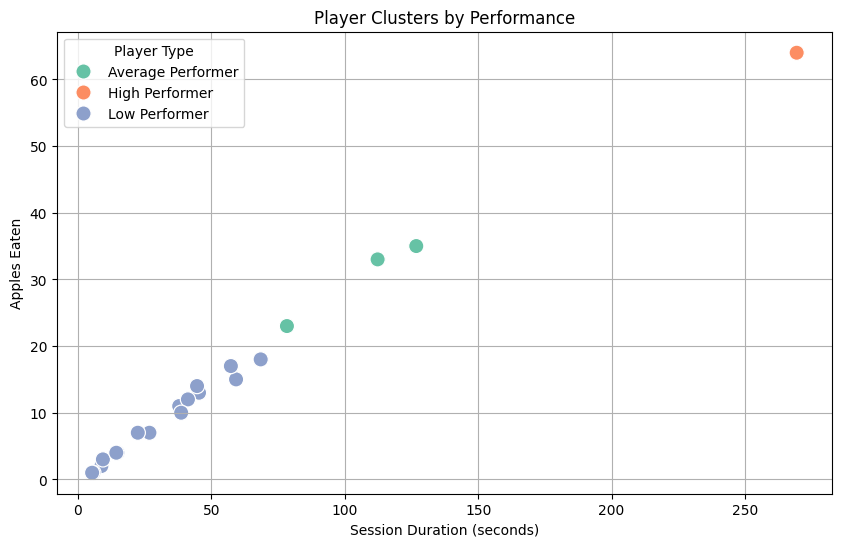

In [7]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x="duration_sec",
    y="applesEaten",
    hue="performance",
    palette="Set2",
    s=120
)
plt.title("Player Clusters by Performance")
plt.xlabel("Session Duration (seconds)")
plt.ylabel("Apples Eaten")
plt.grid(True)
plt.legend(title="Player Type")
plt.show()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import numpy as np

# ✅ 1. إنشاء عمود فشل
df["failed"] = np.where((df["duration_sec"] < 20) & (df["applesEaten"] < 5), 1, 0)

# ✅ 2. تجهيز البيانات
X = df[["duration_sec", "applesEaten", "movements_count", "directionChanges"]]
y = df["failed"]

# ✅ 3. تقسيم Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ✅ 4. تدريب Decision Tree
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

# ✅ 5. التنبؤ والتقييم
y_pred = model.predict(X_test)

print("📄 Classification Report:")
print(classification_report(y_test, y_pred))

print("\n🧮 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n🎯 Accuracy Score:", accuracy_score(y_test, y_pred))


📄 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6


🧮 Confusion Matrix:
[[4 0]
 [0 2]]

🎯 Accuracy Score: 1.0


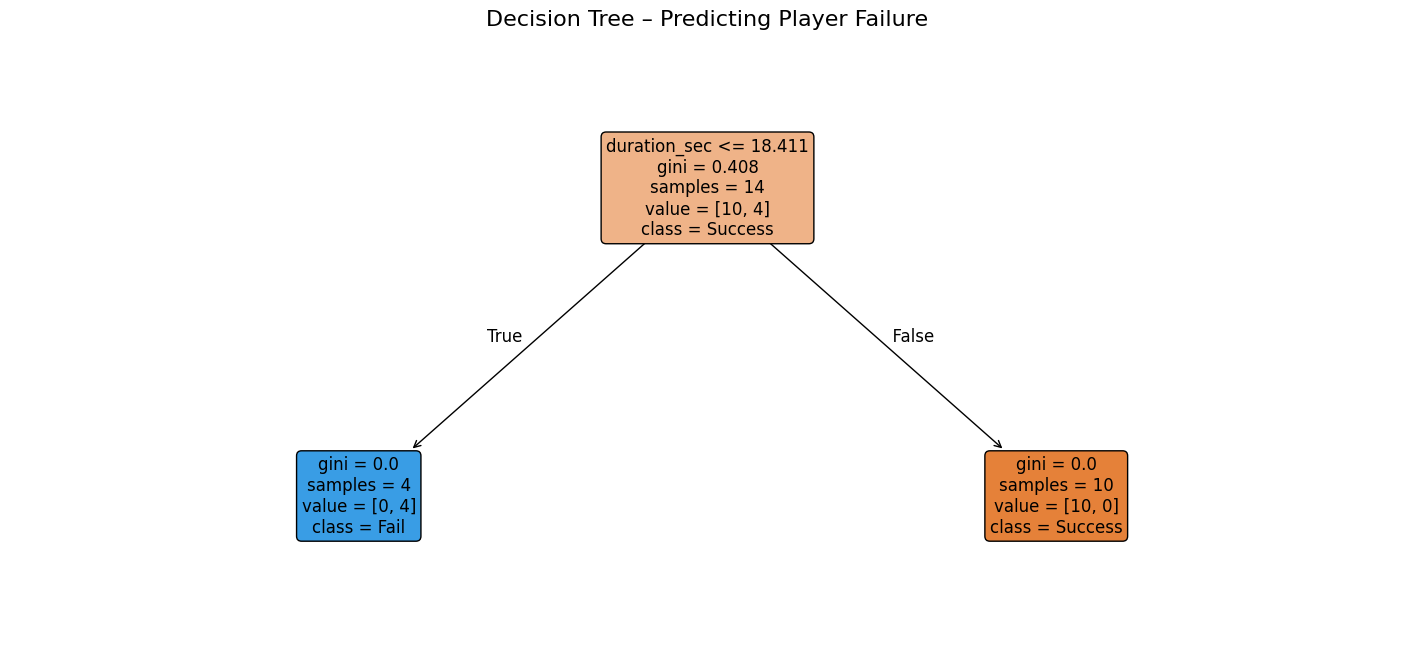

In [9]:
plt.figure(figsize=(18, 8))
plot_tree(
    model,
    feature_names=["duration_sec", "applesEaten", "movements_count", "directionChanges"],
    class_names=["Success", "Fail"],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Decision Tree – Predicting Player Failure", fontsize=16)
plt.show()


In [10]:
import json
import os
from collections import Counter

data_path = '/content/drive/MyDrive/snake_data'  # عدل المسار حسب بياناتك

def key_to_name(key):
    mapping = {
        "ArrowUp": "Up",
        "ArrowDown": "Down",
        "ArrowLeft": "Left",
        "ArrowRight": "Right"
    }
    return mapping.get(key, "Unknown")

def movements_to_sequence(movements):
    sequence = []
    for m in movements:
        key = m.get('key')
        if key:
            sequence.append(key_to_name(key))
    return sequence

def get_ngrams(sequence, n=3):
    return [tuple(sequence[i:i+n]) for i in range(len(sequence) - n + 1)]

all_ngrams = []

for filename in os.listdir(data_path):
    if filename.endswith(".json"):
        with open(os.path.join(data_path, filename), 'r') as f:
            session = json.load(f)
            seq = movements_to_sequence(session.get("movements", []))
            ngrams = get_ngrams(seq, n=3)
            all_ngrams.extend(ngrams)

counter = Counter(all_ngrams)
most_common = counter.most_common(10)

print("Top 10 Most Frequent 3-Move Patterns:")
if len(most_common) == 0:
    print(0)
else:
    for pattern, count in most_common:
        print(" -> ".join(pattern), f" | Occurrences: {count}")


Top 10 Most Frequent 3-Move Patterns:
0


In [11]:
failure_rate = df["failed"].mean() * 100
avg_apples_fail = df[df["failed"] == 1]["applesEaten"].mean()
avg_duration_fail = df[df["failed"] == 1]["duration_sec"].mean()
avg_apples_success = df[df["failed"] == 0]["applesEaten"].mean()
avg_duration_success = df[df["failed"] == 0]["duration_sec"].mean()

print("📌 Design Recommendations:\n")

if failure_rate > 50:
    print(f"🔴 {failure_rate:.1f}% of players failed. Consider adding a tutorial in the early game.")

if avg_duration_fail < 20:
    print(f"⏱️ Failed players lasted only {avg_duration_fail:.1f} seconds on average. Consider slowing down game start.")

if avg_apples_fail < 5:
    print(f"🍏 Players who failed collected only {avg_apples_fail:.1f} apples. Try placing apples closer or more frequently.")

if avg_apples_success > 15 and avg_duration_success > 60:
    print(f"🏆 Skilled players are playing long sessions with {avg_apples_success:.1f} apples. Consider adding advanced challenges or bonus levels.")


📌 Design Recommendations:

⏱️ Failed players lasted only 9.7 seconds on average. Consider slowing down game start.
🍏 Players who failed collected only 2.5 apples. Try placing apples closer or more frequently.
🏆 Skilled players are playing long sessions with 19.9 apples. Consider adding advanced challenges or bonus levels.


In [15]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 95.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.6 MB/s eta 0:00:00


In [12]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import json

st.title("Game Analytics Dashboard - Snake Game")

# تحميل البيانات من ملفات CSV و JSON
df = pd.read_csv("data.csv")
with open("ngrams.json", "r") as f:
    all_ngrams = json.load(f)

st.header("Player Sessions Data")
st.dataframe(df)

if "cluster_label" in df.columns:
    fig, ax = plt.subplots(figsize=(8,5))
    sns.scatterplot(data=df, x="duration_sec", y="applesEaten", hue="cluster_label", palette="coolwarm", s=100, ax=ax)
    plt.xlabel("Session Duration (seconds)")
    plt.ylabel("Apples Eaten")
    plt.title("Player Clusters by Performance")
    st.pyplot(fig)

st.header("Player Performance")
failed_counts = df['failed'].value_counts()
st.write(f"Good performance: {failed_counts.get(0,0)} players")
st.write(f"Failed performance: {failed_counts.get(1,0)} players")

st.header("Top 10 Most Frequent 3-Move Patterns")
counter = Counter([tuple(x) for x in all_ngrams])
most_common = counter.most_common(10)
for pattern, count in most_common:
    st.write(" -> ".join(pattern), f"| Occurrences: {count}")

st.header("Design Recommendations")
failure_rate = df["failed"].mean() * 100
avg_apples_fail = df[df["failed"] == 1]["applesEaten"].mean()
avg_duration_fail = df[df["failed"] == 1]["duration_sec"].mean()
avg_apples_success = df[df["failed"] == 0]["applesEaten"].mean()
avg_duration_success = df[df["failed"] == 0]["duration_sec"].mean()

if failure_rate > 50:
    st.write(f"🔴 {failure_rate:.1f}% of players failed. Consider adding a tutorial in the early game.")
if avg_duration_fail < 20:
    st.write(f"⏱️ Failed players lasted only {avg_duration_fail:.1f} seconds on average. Consider slowing down game start.")
if avg_apples_fail < 5:
    st.write(f"🍏 Players who failed collected only {avg_apples_fail:.1f} apples. Try placing apples closer or more frequently.")
if avg_apples_success > 15 and avg_duration_success > 60:
    st.write(f"🏆 Skilled players are playing long sessions with {avg_apples_success:.1f} apples. Consider adding advanced challenges or bonus levels.")


Writing app.py


In [16]:
import os
import json
import pandas as pd
import numpy as np

data_path = '/content/drive/MyDrive/snake_data'  # عدل المسار حسب بياناتك

def key_to_name(key):
    mapping = {"ArrowUp": "Up", "ArrowDown": "Down", "ArrowLeft": "Left", "ArrowRight": "Right"}
    return mapping.get(key, "Unknown")

def movements_to_sequence(movements):
    return [key_to_name(m.get('key')) for m in movements if 'key' in m]

def get_ngrams(sequence, n=3):
    if len(sequence) < n:
        return []
    return [tuple(sequence[i:i+n]) for i in range(len(sequence) - n + 1)]

all_sessions = []
all_ngrams = []

for filename in os.listdir(data_path):
    if filename.endswith(".json"):
        with open(os.path.join(data_path, filename), 'r') as f:
            session = json.load(f)
            duration = session.get("duration_ms", 0)
            apples = session.get("applesEaten", 0)
            movements = session.get("movements", [])
            seq = movements_to_sequence(movements)
            ngrams = get_ngrams(seq, n=3)
            all_ngrams.extend(ngrams)
            all_sessions.append({
                "filename": filename,
                "duration_ms": duration,
                "applesEaten": apples,
                "movements_count": len(movements)
            })

df = pd.DataFrame(all_sessions)
df["duration_sec"] = df["duration_ms"] / 1000
df["failed"] = np.where((df["duration_sec"] < 20) & (df["applesEaten"] < 5), 1, 0)

# حفظ الملفات لاستخدامها في Streamlit
df.to_csv("data.csv", index=False)
with open("ngrams.json", "w") as f:
    json.dump(all_ngrams, f)


In [18]:
!pip install pyngrok


In [20]:
from pyngrok import conf
conf.get_default().auth_token = "2xIsAGVFWK1hMl1ptxqG3J0Hfqd_76EU5CCZ9HKxxNBqz7cs8"


In [21]:
from pyngrok import ngrok

public_url = ngrok.connect(addr="8501", proto="http")
print("Streamlit public URL:", public_url)

!streamlit run app.py &>/dev/null&


Streamlit public URL: NgrokTunnel: "https://fa85-34-82-240-218.ngrok-free.app" -> "http://localhost:8501"


In [23]:
# ✅ تأكد أن الأعمدة موجودة في df قبل استخدامها
def safe_mean(df, col, condition=None):
    try:
        if condition is not None:
            return df[condition][col].mean()
        else:
            return df[col].mean()
    except:
        return None

# ✅ حساب الإحصائيات الأساسية بأمان
failure_rate = safe_mean(df, "failed") * 100 if "failed" in df else 0
avg_apples_fail = safe_mean(df, "applesEaten", df["failed"] == 1)
avg_duration_fail = safe_mean(df, "duration_sec", df["failed"] == 1)
avg_moves_fail = safe_mean(df, "movements_count", df["failed"] == 1)
avg_changes_fail = safe_mean(df, "directionChanges", df["failed"] == 1)

avg_apples_success = safe_mean(df, "applesEaten", df["failed"] == 0)
avg_duration_success = safe_mean(df, "duration_sec", df["failed"] == 0)
avg_moves_success = safe_mean(df, "movements_count", df["failed"] == 0)

# ✅ عرض التوصيات
print("📌 Design Recommendations:\n")

if failure_rate and failure_rate > 50:
    print(f"🔴 {failure_rate:.1f}% of players failed. Consider adding a tutorial or guidance early in the game.")

if avg_duration_fail and avg_duration_fail < 20:
    print(f"⏱️ Failed players lasted only {avg_duration_fail:.1f} seconds. Consider slowing down the game start or adding safety time.")

if avg_apples_fail and avg_apples_fail < 5:
    print(f"🍏 Failed players collected only {avg_apples_fail:.1f} apples. Try placing apples closer to the player at the beginning.")

if avg_changes_fail is not None and avg_changes_fail < 2:
    print(f"↪️ Failed players rarely changed direction ({avg_changes_fail:.1f} times). Consider giving directional hints or animations.")

if avg_apples_success and avg_duration_success and avg_apples_success > 15 and avg_duration_success > 60:
    print(f"🏆 High performers ate {avg_apples_success:.1f} apples in {avg_duration_success:.1f} seconds. Add bonus levels or faster challenges.")

print("✅ Use these insights to balance your game and improve player experience.")


📌 Design Recommendations:

⏱️ Failed players lasted only 9.7 seconds. Consider slowing down the game start or adding safety time.
🍏 Failed players collected only 2.5 apples. Try placing apples closer to the player at the beginning.
🏆 High performers ate 19.9 apples in 73.5 seconds. Add bonus levels or faster challenges.
✅ Use these insights to balance your game and improve player experience.
